In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:\Machine Learning Projects\Fraud Detection using Machine Learning\data\Imported_data.csv")
display(df.head())      ## (or) df.head() This will display the first 5 rows of the dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


__1. Correlation Analysis__

In [2]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


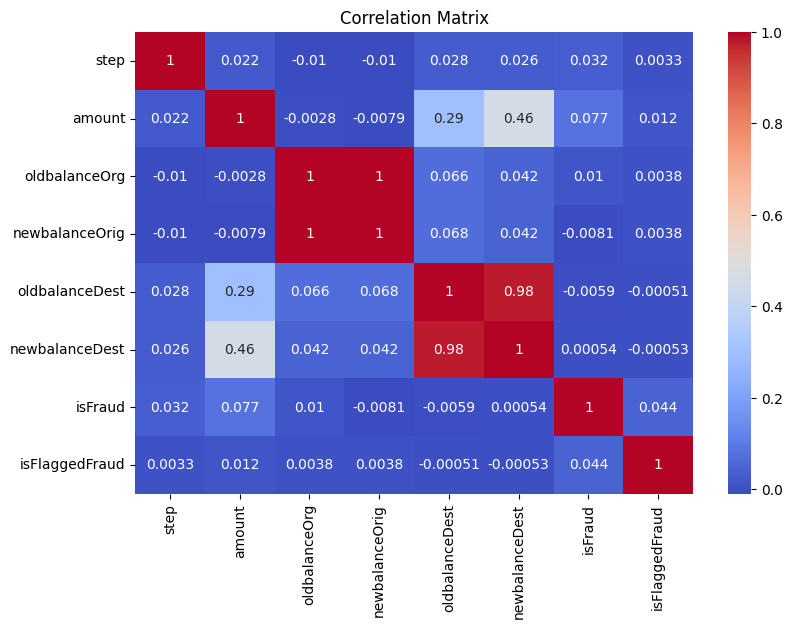

In [3]:
plt.figure(figsize=(9,6))

# Visualize heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [4]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with drop='first' and sparse_output=False
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the 'type' column
encoded = encoder.fit_transform(df[['type']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['type'])

# Add the encoded columns directly to the original DataFrame
df[feature_names] = encoded

# Drop the original 'type' column
df.drop(columns=['type'], inplace=True)

# Display the updated DataFrame
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [5]:
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

In [6]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,1.0,0.0


    Random Forest Feature Importance

In [7]:
X = df.drop(columns=['isFraud', 'isFlaggedFraud'], axis=1)  # Features
y=df['isFraud']  # Target
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X, y)

feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

          Feature  Importance
5  newbalanceDest    0.341202
2   oldbalanceOrg    0.232561
1          amount    0.124373
0            step    0.077110
4  oldbalanceDest    0.067386
9   type_TRANSFER    0.063283
3  newbalanceOrig    0.050608
6   type_CASH_OUT    0.041773
8    type_PAYMENT    0.001699
7      type_DEBIT    0.000006
